In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 0: Goal Definition

The goal of this project is to develop a machine learning model capable of classifying Windows Portable executable (PE) files as malicious or bening based on static features extracted from the files themselves.

To achieve this objective, the dataset used consists of PE file characteristics extracted from a collection of Windows executable and DLL files. Each entry represents a unique file with various attributes extracted from its PE header and structure. The dataset includes both benign software samples and known malware samples.

Dataset available at the following link:
https://www.kaggle.com/datasets/amdj3dax/ransomware-detection-data-set


### Column descriptios obtained from the source

In [2]:
# Column description obtained from the source of the dataset
column_descriptions = [
    {"Column Name": "FileName", "Description": "Name or identifier of the PE file"},
    {"Column Name": "md5Hash", "Description": "MD5 hash of the file for unique identification"}, 
    {"Column Name": "Machine", "Description": "Target machine architecture identifier"}, 
    {"Column Name": "DebugSize", "Description": "Size of debug information"}, 
    {"Column Name": "DebugRVA", "Description": "Relative Virtual Address of debug information"}, 
    {"Column Name": "MajorImageVersion", "Description": "Major version number of the image"}, 
    {"Column Name": "MajorOSVersion", "Description": "Major version number of required operating system"}, 
    {"Column Name": "ExportRVA", "Description": "Relative Virtual Address of export table"}, 
    {"Column Name": "ExportSize", "Description": "Size of export table"}, 
    {"Column Name": "IatVRA", "Description": "Relative Virtual Address of Import Address Table"}, 
    {"Column Name": "MajorLinkerVersion", "Description": "Major version number of linker"}, 
    {"Column Name": "MinorLinkerVersion", "Description": "Minor version number of linker"}, 
    {"Column Name": "NumberOfSections", "Description": "Number of sections in the PE file"}, 
    {"Column Name": "SizeOfStackReserve", "Description": "Size of stack to reserve"}, 
    {"Column Name": "DllCharacteristics", "Description": "DLL characteristics flags"}, 
    {"Column Name": "ResourceSize", "Description": "Size of resource section"}, 
    {"Column Name": "BitcoinAddresses", "Description": "Number of potential Bitcoin addresses found"}, 
    {"Column Name": "Benign", "Description": "Binary label (1 for benign, 0 for malicious)"}
]

df_description = pd.DataFrame(column_descriptions)

df_description


,Column Name,Description
0,FileName,Name or identifier of the PE file
1,md5Hash,MD5 hash of the file for unique identification
2,Machine,Target machine architecture identifier
3,DebugSize,Size of debug information
4,DebugRVA,Relative Virtual Address of debug information
5,MajorImageVersion,Major version number of the image
6,MajorOSVersion,Major version number of required operating system
7,ExportRVA,Relative Virtual Address of export table
8,ExportSize,Size of export table
9,IatVRA,Relative Virtual Address of Import Address Table


### Target variable
According to the dataset source, the 'Benign' column can be used as a label for supervised learning tasks. In fact, it is our target variable, and it can assume two possible values:
- 1 for bening
- 0 for malicious

## Step 1: Data Acquisition

In [3]:
df = pd.read_csv('./dataset/data_file.csv', sep=',')
df

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,VirusShare_a43ceb5e5fffc793e0205d15a0606cb0,a43ceb5e5fffc793e0205d15a0606cb0,332,0,0,1,4,0,0,4096,6,0,3,1048576,0,23504,0,0
62481,VirusShare_0190dafc8304111a00fccf57340ea6a4,0190dafc8304111a00fccf57340ea6a4,332,0,0,7,10,0,0,0,7,0,7,1048576,0,15704,0,0
62482,VirusShare_0f3ca55979aaf59158d6b01140696e44,0f3ca55979aaf59158d6b01140696e44,332,0,0,0,4,0,0,404908,2,50,11,1048576,0,2364,0,0
62483,VirusShare_fca5ce35f1690db6babca5aa5d559535,fca5ce35f1690db6babca5aa5d559535,332,0,0,0,4,14448,70,4096,8,0,4,1048576,0,130296,0,0


## Step 2: Data Exploration

In [4]:
df.head()   # first rows of the dataset

,FileName,md5Hash,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
1,05c8318f98a5d301d80000009c316005.vertdll.dll,95e19f3657d34a432eada93221b0ea16,34404,84,121728,10,10,126576,4930,0,14,10,8,262144,16864,1024,0,1
2,06054fba-5619-4a86-a861-ffb0464bef5d.dll,85c32641d77a54e19ba8ea4ab305c791,332,0,0,0,4,0,0,8192,8,0,3,1048576,34112,672,0,1
3,075822ac99a5d301660400009c316005.adhapi.dll,62e3b959d982ef534b66f819fe15f085,34404,84,19904,10,10,21312,252,18160,14,10,6,262144,16736,1040,0,1
4,090607dd9ba5d301ca0900009c316005.SensorsNative...,ae38c5f7d313ad0ff3bfb8826476767f,34404,84,97728,10,10,105792,1852,70592,14,10,7,262144,16736,1096,0,1


In [ ]:
df.shape    # information about number of rows and number of columns

(62485, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   FileName            62485 non-null  object
 1   md5Hash             62485 non-null  object
 2   Machine             62485 non-null  int64 
 3   DebugSize           62485 non-null  int64 
 4   DebugRVA            62485 non-null  int64 
 5   MajorImageVersion   62485 non-null  int64 
 6   MajorOSVersion      62485 non-null  int64 
 7   ExportRVA           62485 non-null  int64 
 8   ExportSize          62485 non-null  int64 
 9   IatVRA              62485 non-null  int64 
 10  MajorLinkerVersion  62485 non-null  int64 
 11  MinorLinkerVersion  62485 non-null  int64 
 12  NumberOfSections    62485 non-null  int64 
 13  SizeOfStackReserve  62485 non-null  int64 
 14  DllCharacteristics  62485 non-null  int64 
 15  ResourceSize        62485 non-null  int64 
 16  BitcoinAddresses    62

There are no missing data

In [5]:
df.duplicated().sum()   # count number of duplicated data

0

In [6]:
df.describe()   # stats about numerical columns

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
count,62485.000000,6.248500e+04,6.248500e+04,62485.000000,62485.000000,6.248500e+04,6.248500e+04,6.248500e+04,62485.000000,62485.000000,62485.000000,6.248500e+04,62485.000000,6.248500e+04,62485.000000,62485.000000
mean,6756.472657,2.587048e+04,1.541611e+05,58.785997,5.417524,8.953186e+05,4.094623e+05,1.466311e+05,9.782604,6.613171,4.751172,8.759830e+05,12966.031400,1.844664e+05,0.018004,0.433992
std,13345.499919,6.461396e+06,1.903142e+06,1114.068244,2.543697,3.779527e+07,2.851820e+07,1.124630e+06,9.047157,16.976465,2.138584,6.288189e+05,15762.725511,1.732625e+07,0.132968,0.495628
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,332.000000,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000e+00,0.000000e+00,4.096000e+03,6.000000,0.000000,3.000000,2.621440e+05,0.000000,1.080000e+03,0.000000,0.000000
50%,332.000000,0.000000e+00,0.000000e+00,0.000000,5.000000,0.000000e+00,0.000000e+00,8.520000e+03,9.000000,0.000000,5.000000,1.048576e+06,320.000000,2.496000e+03,0.000000,0.000000
75%,332.000000,2.800000e+01,1.283200e+04,6.000000,6.000000,2.875200e+04,1.040000e+02,6.553600e+04,11.000000,10.000000,6.000000,1.048576e+06,32768.000000,2.350400e+04,0.000000,1.000000
max,43620.000000,1.615155e+09,2.852127e+08,63325.000000,260.000000,2.147484e+09,2.415919e+09,6.615450e+07,255.000000,255.000000,33.000000,1.677722e+07,58632.000000,4.294942e+09,1.000000,1.000000


In [7]:
df.describe(include="object") 

,FileName,md5Hash
count,62485,62485
unique,62485,62485
top,0124e21d-018c-4ce0-92a3-b9e205a76bc0.dll,79755c51e413ed3c6be4635fd729a6e1
freq,1,1


In [16]:
df.isnull().sum()     # see the sum of missing data for each column

FileName              0
md5Hash               0
Machine               0
DebugSize             0
DebugRVA              0
MajorImageVersion     0
MajorOSVersion        0
ExportRVA             0
ExportSize            0
IatVRA                0
MajorLinkerVersion    0
MinorLinkerVersion    0
NumberOfSections      0
SizeOfStackReserve    0
DllCharacteristics    0
ResourceSize          0
BitcoinAddresses      0
Benign                0
dtype: int64

As you can see from statistics, 'FileName' and 'md5Hash' have a unique value for each object of the dataset.
Therefore, they are not useful for the classification.

The target variable is binary, and all other features are numerical. Let's check if any of them are categorical.
First, we will examine the number of unique values for each feature, as categorical features typically have a limited number of unique values. Second, we will analyze the meaning of each feature to determine if any of them represent a categorical data.


In [ ]:
df.nunique()

FileName              62485
md5Hash               62485
Machine                   6
DebugSize                26
DebugRVA              10395
MajorImageVersion        49
MajorOSVersion           17
ExportRVA             11673
ExportSize             2885
IatVRA                 5727
MajorLinkerVersion       89
MinorLinkerVersion      117
NumberOfSections         26
SizeOfStackReserve       29
DllCharacteristics       86
ResourceSize           9083
BitcoinAddresses          2
Benign                    2
dtype: int64

From the number of unique values for each feature and knowing their meaning, we can conclude that the following features are categorical:
- Machine: CPU for which the file was designed (it has 6 unique values).
- MajorImageVersion: main version of the software.
- MajorOSVersion: main version number of the required operating system.
- MajorLinkerVersion: main version number of the linker that created the file.
- MinorLinkerVersion: secondary version number of the linker that created the file.
- DllCharacteristics: under which circumstances to initialize the DLL.
- NumberOfSections: number of sections the PE file should contain.

On the other hand, the following features have continuous numerical values:
- DebugSize: size of the debug information.
- DebugRVA: Relative Virtual Address (RVA) of the debug information.
- ExportRVA: RVA of the export table.
- ExportSize: size of the export table.
- IatVRA: RVA of the Import Address Table (IAT).
- SizeOfStackReserve: amount of memory to reserve for the initial thread stack.
- ResourceSize: size of the resources.
- BitcoinAddresses: number of potential Bitcoin addresses found.

In [ ]:
header_names = ['FileName', 'md5Hash', 'Machine', 'DebugSize', 'DebugRVA', 'MajorImageVersion', 'MajorOSVersion', 
                'ExportRVA', 'ExportSize', 'IatVRA', 'MajorLinkerVersion', 'MinorLinkerVersion', 'NumberOfSections', 
                'SizeOfStackReserve', 'DllCharacteristics', 'ResourceSize', 'BitcoinAddresses', 'Benign']

#nominal_cols = []
#binary_cols = ['Benign']
#numeric_cols = []

FileName              62485
md5Hash               62485
Machine                   6
DebugSize                26
DebugRVA              10395
MajorImageVersion        49
MajorOSVersion           17
ExportRVA             11673
ExportSize             2885
IatVRA                 5727
MajorLinkerVersion       89
MinorLinkerVersion      117
NumberOfSections         26
SizeOfStackReserve       29
DllCharacteristics       86
ResourceSize           9083
BitcoinAddresses          2
Benign                    2
dtype: int64


### Data Visualization

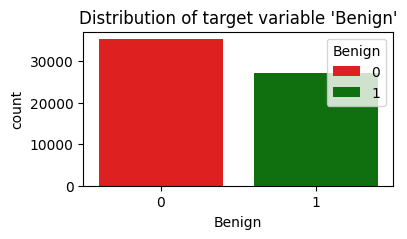

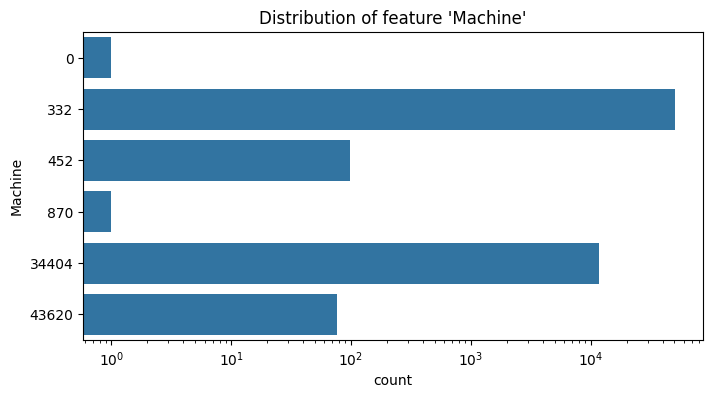

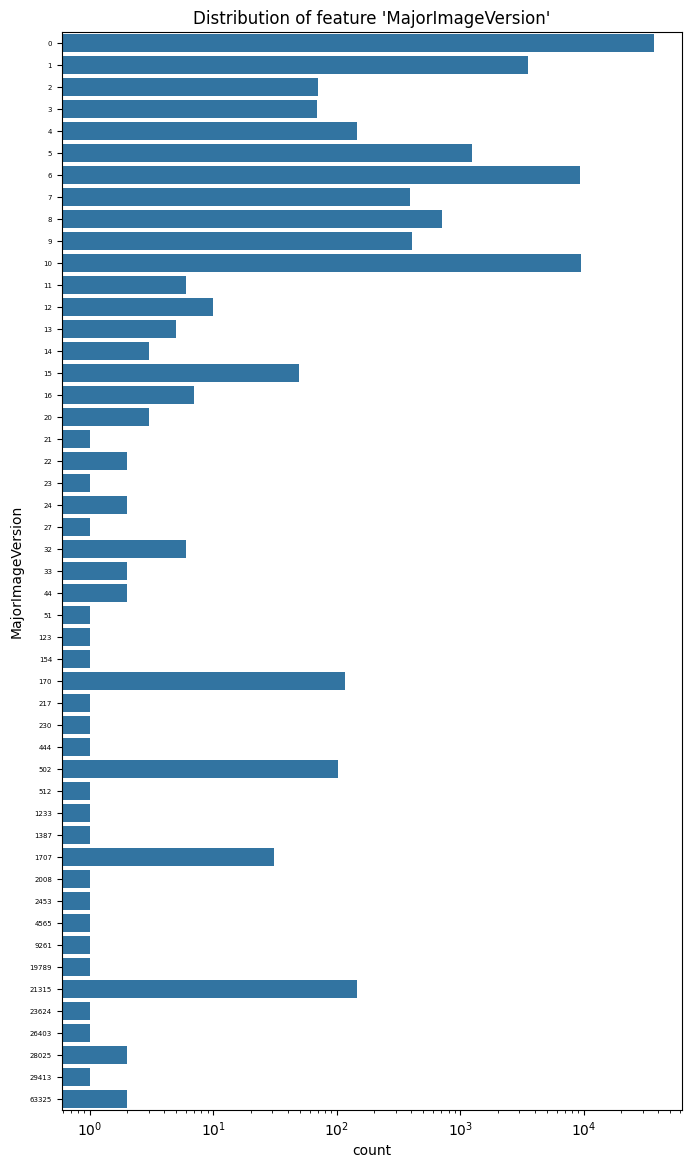

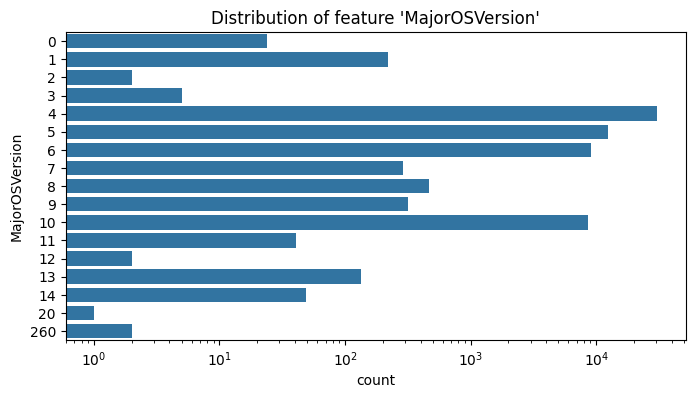

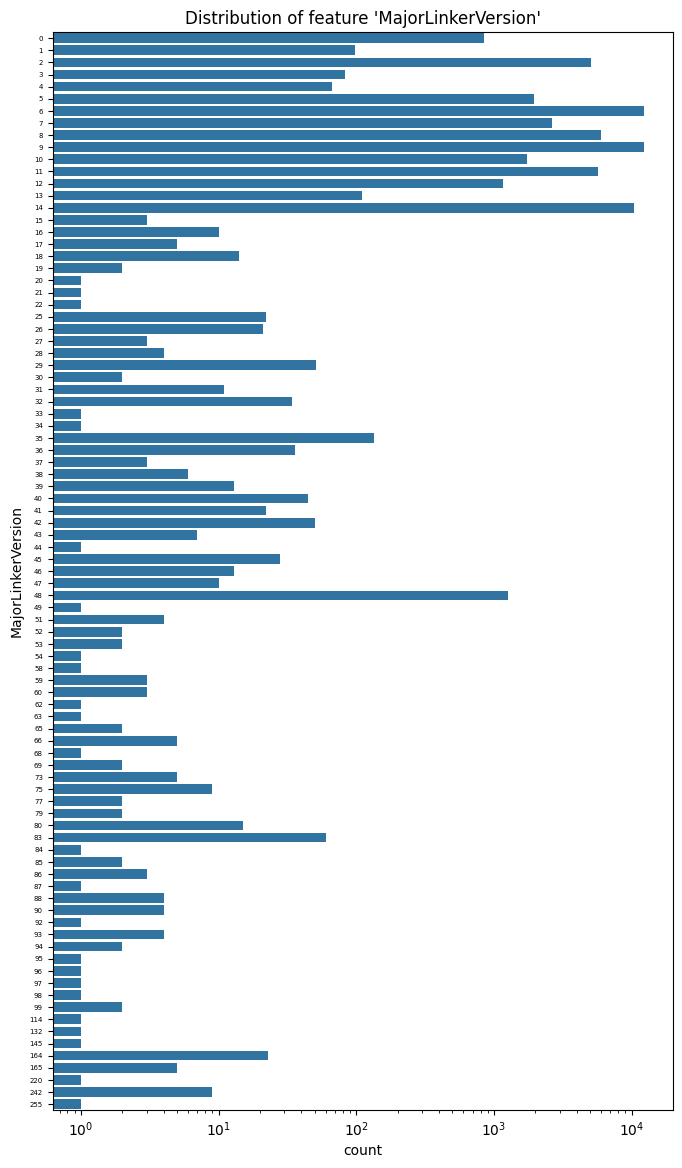

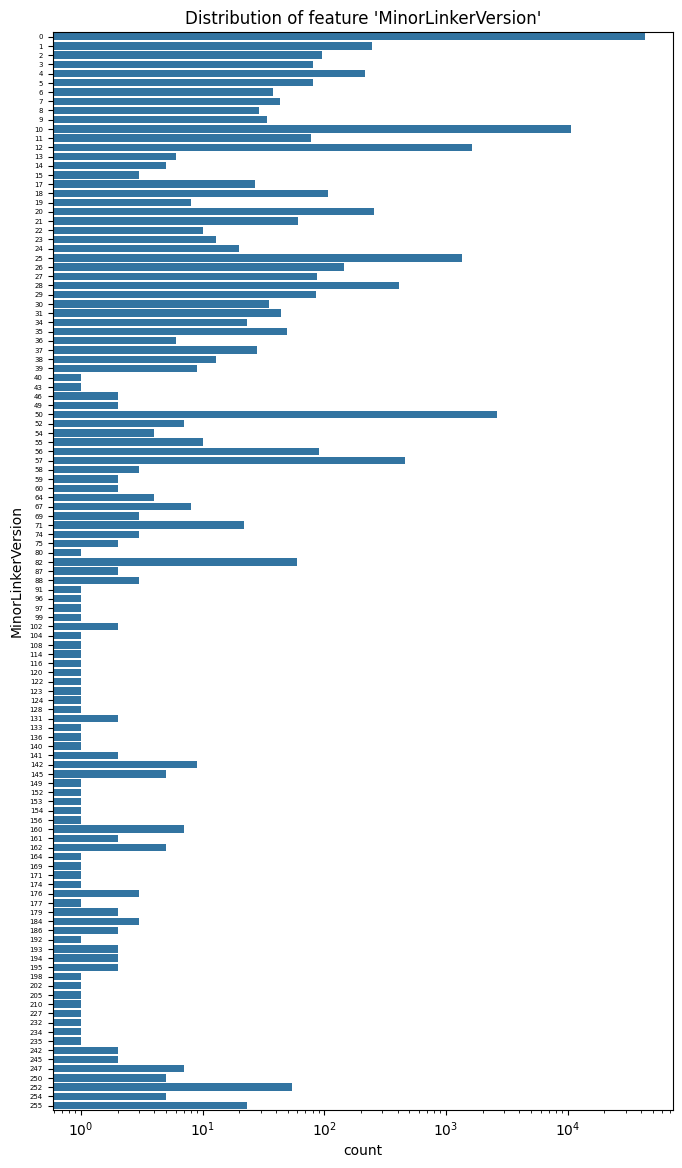

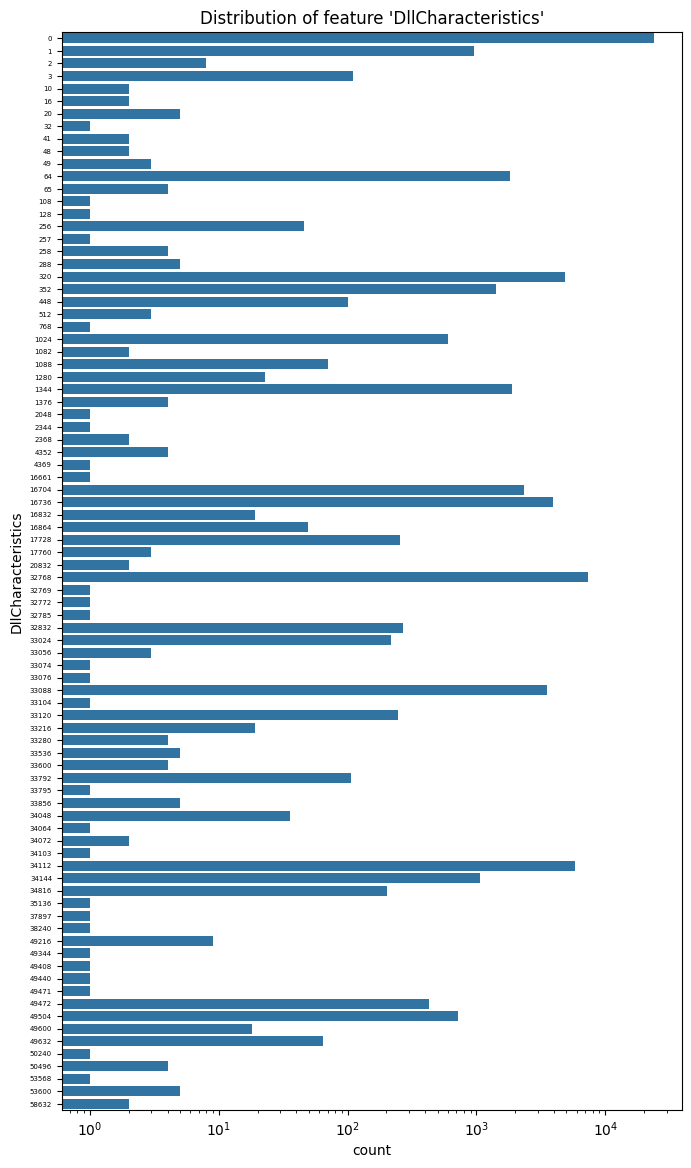

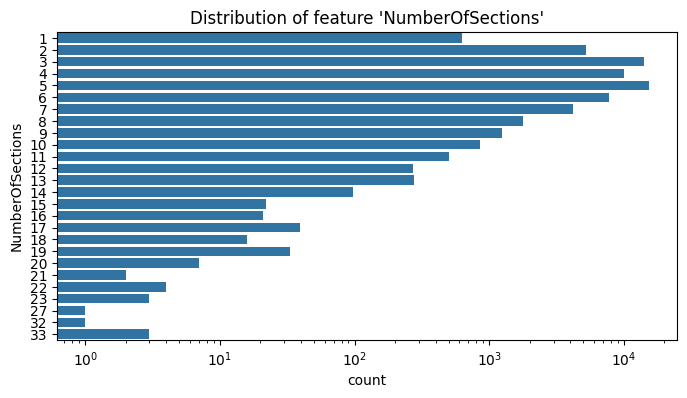

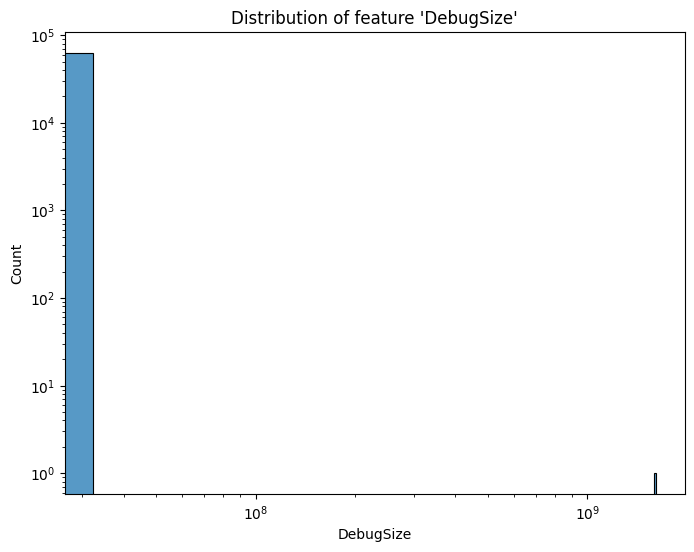

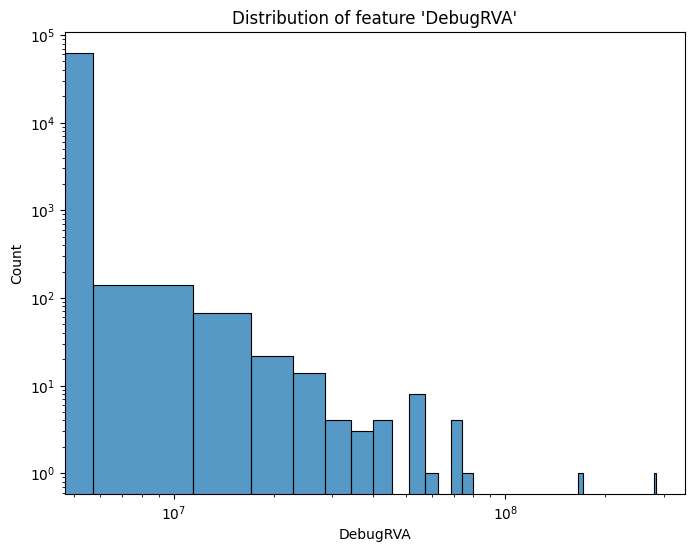

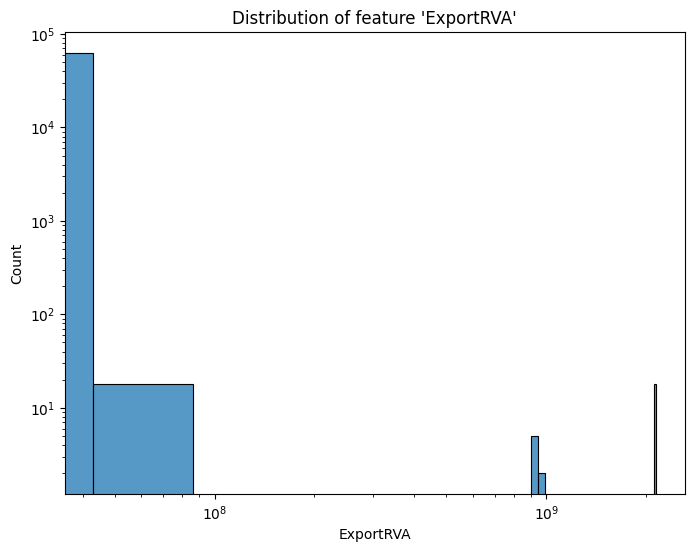

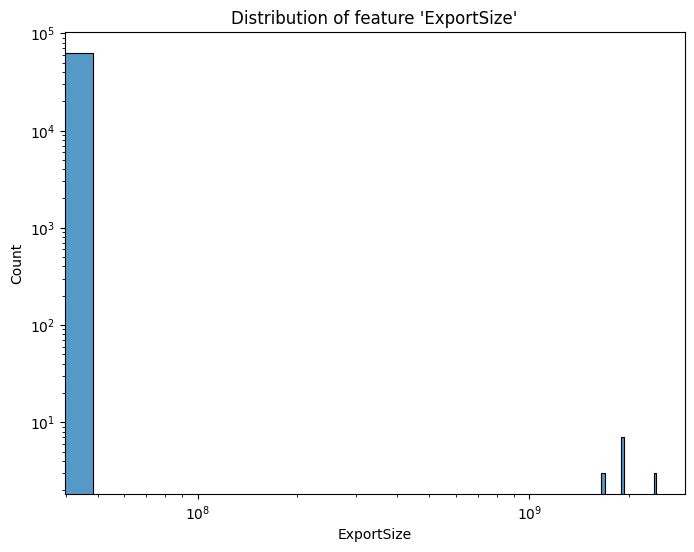

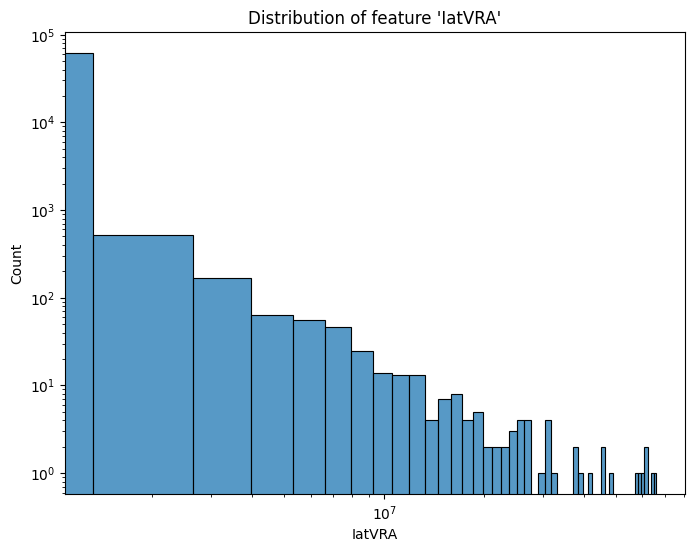

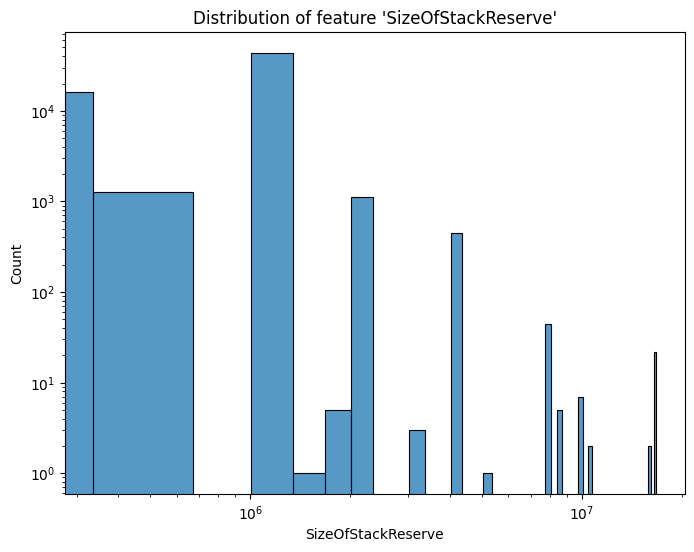

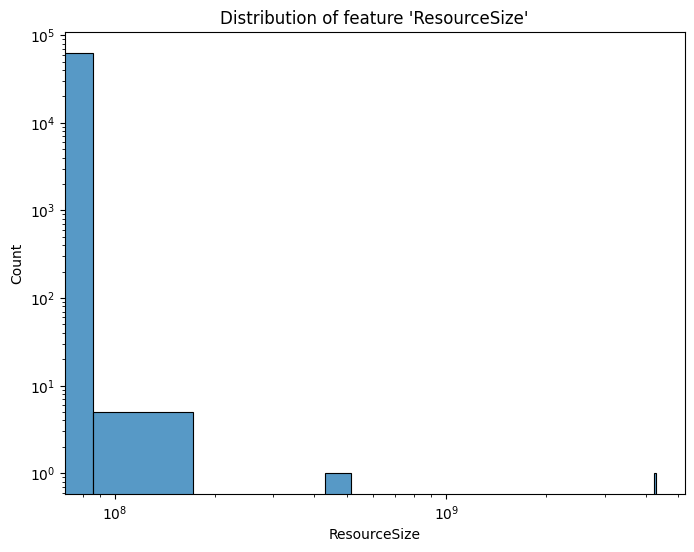

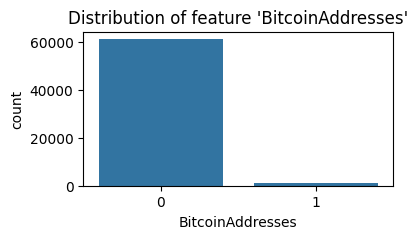

In [73]:

categorical_columns = ['Machine', 'MajorImageVersion', 'MajorOSVersion', 'MajorLinkerVersion', 'MinorLinkerVersion', 'DllCharacteristics', 'NumberOfSections']

df[categorical_columns] = df[categorical_columns].astype('category')

numeric_columns = df.select_dtypes(include=['int64']).columns
#numeric_columns = [col for col in numeric_columns if col not in categorical_columns]

# Histogram for the target variable
plt.figure(figsize=(4,2))
sns.countplot(df, x='Benign', hue='Benign', palette={0:'red', 1:'green'})
plt.title("Distribution of target variable 'Benign'")
plt.show()

# Barplot for categorical variables
for col in categorical_columns:
    if col in ['MajorImageVersion', 'MajorLinkerVersion', 'MinorLinkerVersion', 'DllCharacteristics']: 
        plt.figure(figsize=(8, 14))
        sns.countplot(df, y=col)
        plt.yticks(fontsize=5)
    else:
        plt.figure(figsize=(8, 4))
        sns.countplot(df, y=col)
        plt.yticks(fontsize=10)
    plt.xscale('log')
    plt.title(f"Distribution of feature '{col}'")
    plt.show()

# Histogram for numeric variables
for col in numeric_columns:
    if col != 'Benign' and col != 'BitcoinAddresses':
        plt.figure(figsize=(8,6))
        sns.histplot(df, x=col, bins=50)
        plt.xscale('log')
        plt.yscale('log')
        plt.title(f"Distribution of feature '{col}'")
        plt.show()

# Histogram for BitcoinAddresses which only has two unique values
plt.figure(figsize=(4,2))
sns.countplot(df, x='BitcoinAddresses')
plt.title("Distribution of feature 'BitcoinAddresses'")
plt.show()
